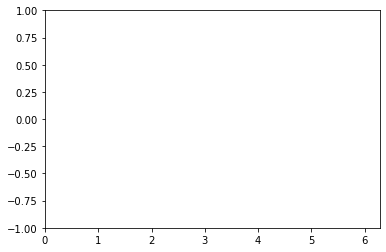

In [1]:
from wpspec import Quantum, harmonic, pib
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

params = {'box_length': 4, 'v_offset': 0, 'grid_points': 500, 'wfc_offset': 0, 'system': 'pib'}

wf = Quantum(params)
#print(wf.x)
#print(wf.Psi)

wf.dt = 0.01
D = 1
a = 1.5
re = 0
#### Morse potential 
wf.V = D*(1 - np.exp(-a*(wf.x - re)))**2
#### wf.build_operator()
#plt.plot(wf.x,  wf.Psi, 'blue', label='analytic')
#plt.plot(wf.x,  wf.V, 'red', label='Potential')
#plt.plot(wf.x, T_Psi, 'r--', label='Derivative')
#plt.ylim(-1,2)
def init():
    ax.set_xlim(0, 2*np.pi) 
    ax.set_ylim(-1, 1) 
    return ln,
    
def update(frame): 
    xdata.append(frame) 
    ydata.append(np.sin(frame)) 
    ln.set_data(xdata, ydata) 
    return ln,
    

fig, ax = plt.subplots() 
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro') 
ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),init_func=init, blit=True) 
rc('animation', html='jshtml') 
ani
plt.show()


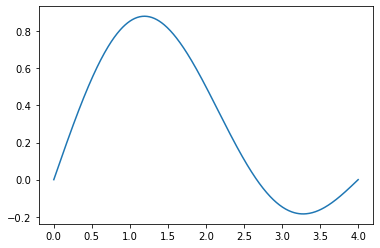

In [2]:
pi = pib(params)
pi.Psi = np.sqrt(1/2) * pi.eigenfunction(1) + np.sqrt(1/2) * pi.eigenfunction(2)
plt.plot(pi.x, pi.Psi)

pi.expand_pib()


(1.121924764270406+0j)


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


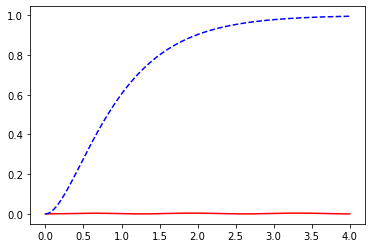

In [3]:
wf.finite_difference_T_matrix()
wf.finite_difference_V_matrix()
wf.finite_difference_H_matrix()


from scipy.sparse.linalg import eigs

vals, vecs = eigs(wf.H_matrix, k=5,  which='SM')
print(vals[0])

plt.plot(wf.x, vecs[:,2]**2, 'red')
plt.plot(wf.x, wf.V, 'b--')
#plt.ylim(0,0.005)
plt.show()

In [ ]:

from matplotlib import animation, rc
from IPython.display import HTML

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()
plt.close()


### parameters for plot
ax.set_xlim((-wf.L, wf.L))
ax.set_ylim((-1, 2))

line, = ax.plot([], [], lw=2)
line1, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line1.set_data([], [])
    return (line, line1,)

In [ ]:
N_time = 300

# animation function. This is called sequentially  
def animate(i):
    
    line.set_data(wf.x, wf.Psi)
    line1.set_data(wf.x, wf.V)
    wf.split_op()
    return (line, line1,)
  
anim = animation.FuncAnimation(fig, animate, init_func=init,
                             frames=N_time, interval=100, blit=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim